In [15]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
import math

from baseline import MultiMethod

import torch
import torch.nn as nn
from ur import Ur

In [16]:
# data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
# datas = glob.glob(os.path.join(data_path, '*.npy'))
# randomidx = np.random.permutation(len(datas))
# datas = [datas[i] for i in randomidx]

data_path_multimodel = '/home/panding/code/UR/piv-data/baseline-multimodel'
data_path_multitransform = '/home/panding/code/UR/piv-data/baseline-multitransform'
data_path_ur = '/home/panding/code/UR/piv-data/test'
data_path_truth = '/home/panding/code/UR/piv-data/truth'

datas_multimodel = glob.glob(os.path.join(data_path_multimodel, '*.npy'))
datas_multitransform = glob.glob(os.path.join(data_path_multitransform, '*.npy'))
datas_ur = glob.glob(os.path.join(data_path_ur, '*.npy'))
datas_truth = glob.glob(os.path.join(data_path_truth, '*.npy'))

datas_multimodel = sorted(datas_multimodel)
datas_multitransform = sorted(datas_multitransform)
datas_ur = sorted(datas_ur)
datas_truth = sorted(datas_truth)

randomidx = np.random.permutation(len(datas_multimodel))
datas_multimodel = [datas_multimodel[i] for i in randomidx]
datas_multitransform = [datas_multitransform[i] for i in randomidx]
datas_ur = [datas_ur[i] for i in randomidx]
datas_truth = [datas_truth[i] for i in randomidx]

/home/panding/code/UR/piv-data/baseline-multimodel/cylinder_Re300_00495.npy


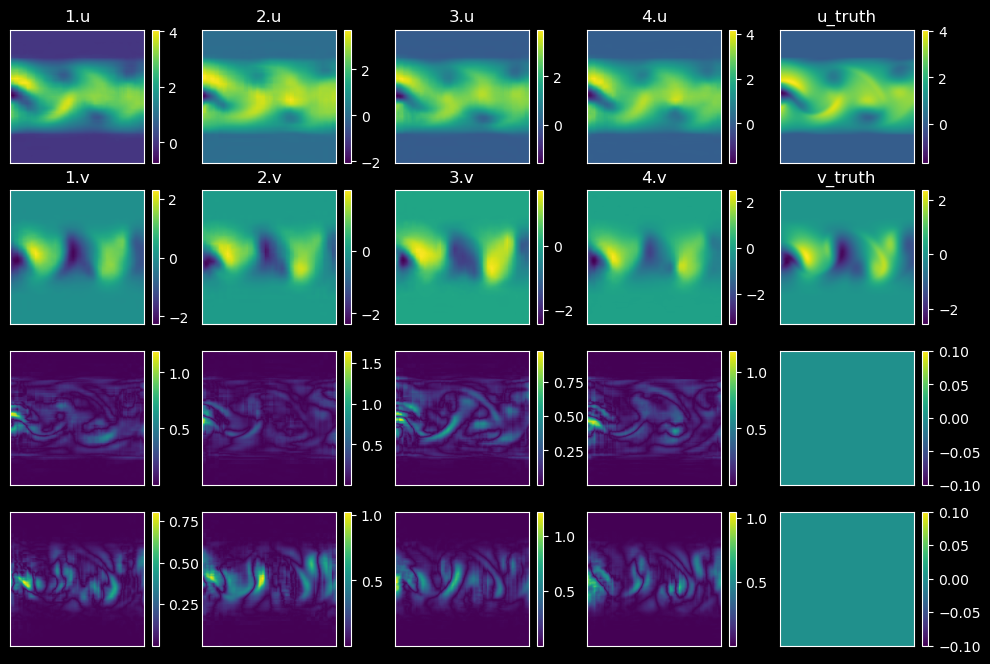

In [17]:
baseline_1 = MultiMethod(datas_multimodel[0], 0)
print(datas_multimodel[0])
baseline_1.show()
# sigma_u, sigma_v = baseline_1.std(show=1)
# sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)
uncertainty_u_mm, uncertainty_v_mm = baseline_1.uncertainty(show=0)

detransform has competed
/home/panding/code/UR/piv-data/baseline-multitransform/cylinder_Re300_00495.npy


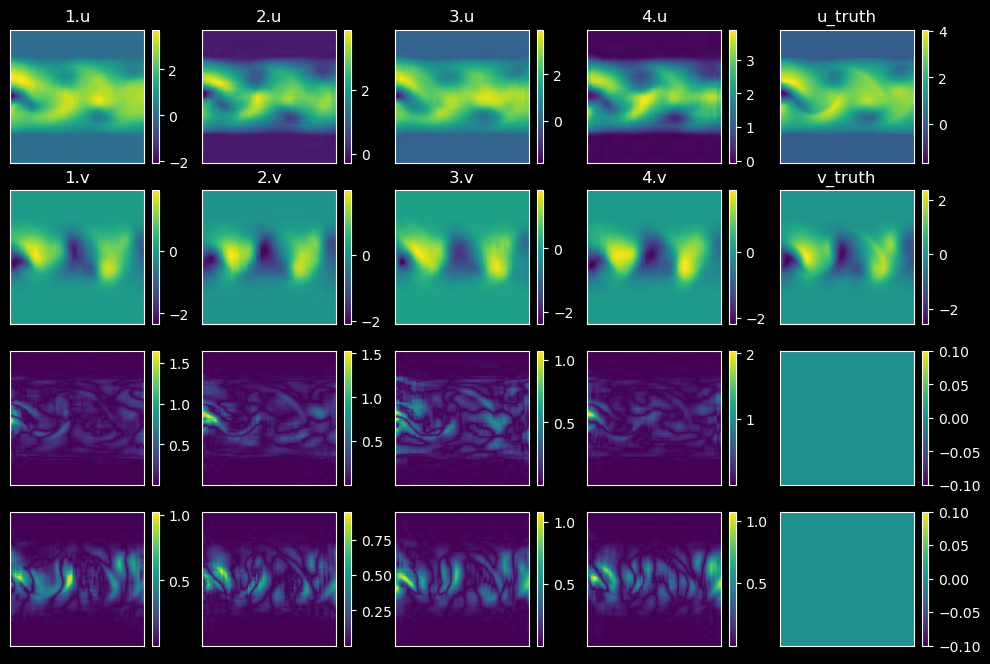

In [18]:
baseline_2 = MultiMethod(datas_multitransform[0], 1)
print(datas_multitransform[0])
baseline_2.show()
# sigma_u, sigma_v = baseline_2.std(show=1)
# sigma_u_t, sigma_v_t = baseline_2.std_truth(show=1)
uncertainty_u_mt, uncertainty_v_mt = baseline_2.uncertainty(show=0)

In [19]:
model_path = '/home/panding/code/UR/unet-model/best-1.pt'
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = np.load(datas_ur[0])
data = data[:4]

uncertainty = Ur('unet', data, path=model_path, device=my_device)
sigma_u_ur_2show, sigma_v_ur_2show = uncertainty.get_sigma2show()
sigma_u_ur, sigma_v_ur = uncertainty.get_sigma()

UNet has loaded
load_state_dict has comple
completed!


In [20]:
def show():
    plt.figure(figsize=(12,8))
            
    plt.subplot(2, 3, 1)
    plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 4)
    plt.title('mm_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 2)
    plt.title('mt_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 5)
    plt.title('mt_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 3)
    plt.title('mue_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_u_ur_2show))
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 6)
    plt.title('mue_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_v_ur_2show))
    plt.colorbar(fraction=0.05)

    plt.show()

In [21]:
def show_truth():
    
    truth = np.load(datas_truth[0])
    
    plt.figure(figsize=(12,6))
            
    plt.subplot(2, 5, 1)
    plt.title('flow_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[0])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 6)
    plt.title('flow_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[1])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 2)
    plt.title('flow_u_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[2])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 7)
    plt.title('flow_v_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[3])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 3)
    plt.title('loss_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[4])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 8)
    plt.title('loss_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[5])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 4)
    plt.title('metrics_epe')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[6])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 9)
    plt.title('metrics_1')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[7])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 5, 5)
    plt.title('metrics_3')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[8])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 5, 10)
    plt.title('metrics_5')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[9])
    plt.colorbar(fraction=0.05)

    plt.show()

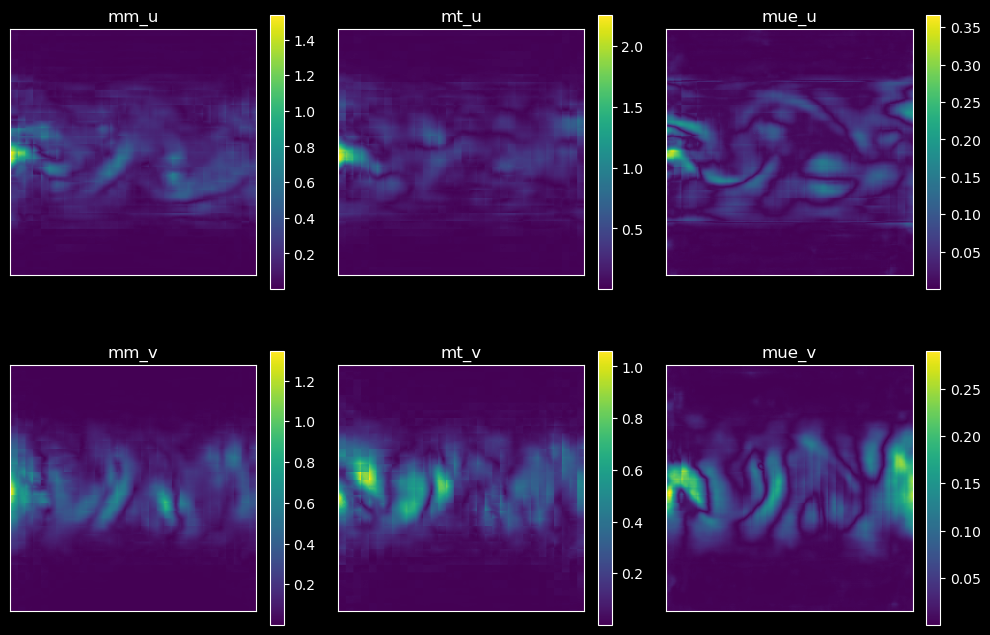

In [22]:
show()

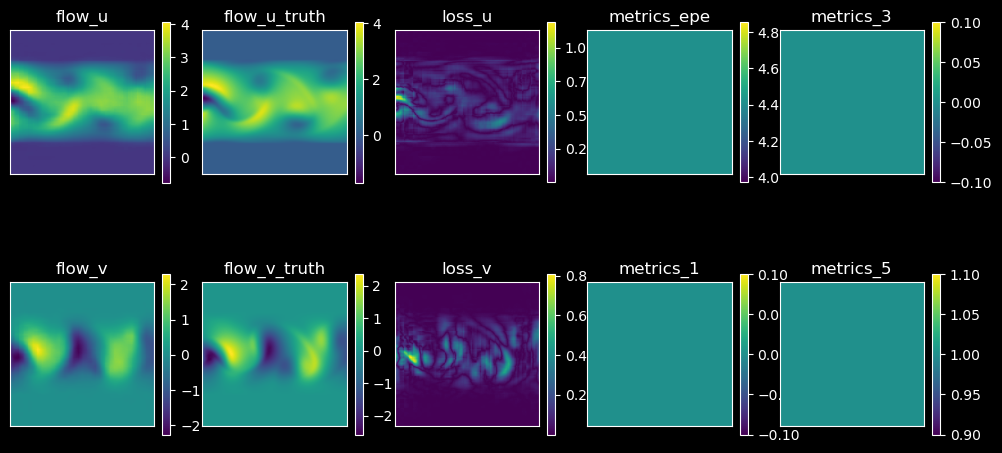

In [23]:
show_truth()

In [24]:
def MSE(arr_1, arr_2):
    mse = np.mean( (arr_1 - arr_2) ** 2 )
    return mse

# PSNR越大，代表着图像质量越好
def PSNR(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# SSIM取值范围为[0,1]，值越大表示输出图像和无失真图像的差距越小，即图像质量越好。
def SSIM(y_true , y_pred):
    u_true = np.mean(y_true)
    u_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    std_true = np.sqrt(var_true)
    std_pred = np.sqrt(var_pred)
    R = 255
    c1 = np.square(0.01*R)
    c2 = np.square(0.03*R)
    ssim = (2 * u_true * u_pred + c1) * (2 * std_pred * std_true + c2)
    denom = (u_true ** 2 + u_pred ** 2 + c1) * (var_pred + var_true + c2)
    return ssim / denom




# PSNR（Peak Signal-to-Noise Ratio）峰值信噪比
PSNR(Peak Signal to Noise Ratio)，峰值信噪比，是一种评价图像的客观标准。，应用场景有很多。它具有局性，PSNR是“Peak Signal to Noise Ratio”的缩写。peak的中文意思是顶点。而ratio的意思是比率或比列的。整个意思就是到达噪音比率的顶点信号，psnr一般是用于最大值信号和背景噪音之间的一个工程项目。通常在经过影像压缩之后，通常输出的影像都会在某种程度与原始影像不同。为了衡量经过处理后的影像品质，通常会参考PSNR值来衡量某个处理程序能否令人满意。它是原图像与被处理图 像之间的均方误差相对于(2n-1)2的对数值(信号最大值的平方，n是每个采样值的比特数)，它的单位是dB。

PSNR是最普遍和使用最为广泛的一种图像客观评价指标，然而它是基于对应像素点间的误差，即 基于误差敏感的图像质量评价。由于并未考虑到人眼的视觉特性（人眼对空间频率较低的对比差异敏感度较高，人眼对亮度对比差异的敏感度较色度高，人眼对一个 区域的感知结果会受到其周围邻近区域的影响等），因而经常出现评价结果与人的主观感觉不一致的情况。

其中，MAXI是表示图像点颜色的最大数值，如果每个采样点用 8 位表示，那么就是 255。

所以MSE越小，则PSNR越大；所以PSNR越大，代表着图像质量越好。一般来说，

PSNR高于40dB说明图像质量极好（即非常接近原始图像）；
在30—40dB通常表示图像质量是好的（即失真可以察觉但可以接受）；
在20—30dB说明图像质量差；
最后，PSNR低于20dB图像不可接受。
# SSIM（structural similarity）结构相似性
SSIM(structural similarity)，结构相似性，是一种衡量两幅图像相似度的指标。

SSIM算法主要用于检测两张相同尺寸的图像的相似度、或者检测图像的失真程度。

SSIM公式基于样本x和y之间的三个比较衡量：亮度 (luminance)、对比度 (contrast) 和结构 (structure)。


In [25]:
def evaluate():   
    truth = np.load(datas_truth[0])
    loss_u = truth[4]
    loss_v = truth[5]

    mse_mm = MSE(loss_u, uncertainty_u_mm)
    mse_mt = MSE(loss_u, uncertainty_u_mt)
    mse_mue = MSE(loss_u, sigma_u_ur)
    print(f"u: mse指标\nmm: {mse_mm}, mt: {mse_mt}, mue: {mse_mue}")
    mse_mm = MSE(loss_v, uncertainty_v_mm)
    mse_mt = MSE(loss_v, uncertainty_v_mt)
    mse_mue = MSE(loss_v, sigma_v_ur)
    print(f"v: mse指标\nmm: {mse_mm}, mt: {mse_mt}, mue: {mse_mue}\n")

    psnr_mm = PSNR(loss_u, uncertainty_u_mm)
    psnr_mt = PSNR(loss_u, uncertainty_u_mt)
    psnr_mue = PSNR(loss_u, sigma_u_ur)
    print(f"u: psnr指标\nmm: {psnr_mm}, mt: {psnr_mt}, mue: {psnr_mue}")
    psnr_mm = PSNR(loss_v, uncertainty_v_mm)
    psnr_mt = PSNR(loss_v, uncertainty_v_mt)
    psnr_mue = PSNR(loss_v, sigma_v_ur)
    print(f"v: psnr指标\nmm: {psnr_mm}, mt: {psnr_mt}, mue: {psnr_mue}\n")

    ssim_mm = SSIM(loss_u, uncertainty_u_mm)
    ssim_mt = SSIM(loss_u, uncertainty_u_mt)
    ssim_mue = SSIM(loss_u, sigma_u_ur)
    print(f"u: ssim指标\nmm: {ssim_mm}, mt: {ssim_mt}, mue: {ssim_mue}")
    ssim_mm = SSIM(loss_v, uncertainty_v_mm)
    ssim_mt = SSIM(loss_v, uncertainty_v_mt)
    ssim_mue = SSIM(loss_v, sigma_v_ur)
    print(f"v: ssim指标\nmm: {ssim_mm}, mt: {ssim_mt}, mue: {ssim_mue}\n")

In [26]:
evaluate()

u: mse指标
mm: 0.012150388211011887, mt: 0.02479800581932068, mue: 0.009536356665194035
v: mse指标
mm: 0.016114741563796997, mt: 0.018963119015097618, mue: 0.005818703677505255

u: psnr指标
mm: 67.28490206784868, mt: 64.1866360328714, mue: 68.33697875305957
v: psnr指标
mm: 66.05857015854609, mt: 65.35170590121072, mue: 70.48254119931782

u: ssim指标
mm: 0.9997230372114302, mt: 0.9994787873894394, mue: 0.9996512354553846
v: ssim指标
mm: 0.9995186544134377, mt: 0.9994761402130455, mue: 0.9998973574396911



```
/home/panding/code/UR/piv-data/baseline-multitransform/cylinder_Re300_00479.npy
```

In [27]:
def show2compare():
    truth = np.load(datas_truth[0])

    plt.figure(figsize=(12,5))

    plt.subplot(2, 4, 1)
    plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 4, 5)
    plt.title('mm_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 4, 2)
    plt.title('mt_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 4, 6)
    plt.title('mt_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 4, 3)
    plt.title('mue_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_u_ur_2show))
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 4, 7)
    plt.title('mue_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_v_ur_2show))
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 4, 4)
    plt.title('u_loss')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[4])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 4, 8)
    plt.title('v_loss')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[5])
    plt.colorbar(fraction=0.05)

    plt.show()

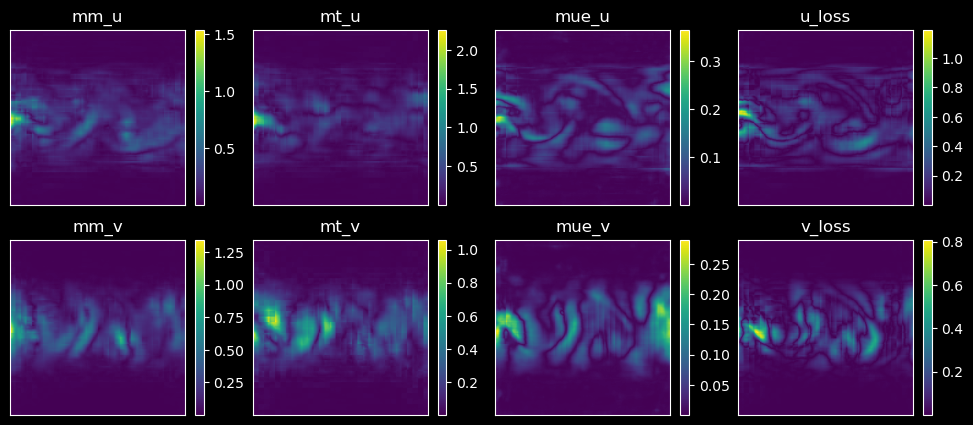

In [28]:
show2compare()